In [3]:
# pip install fastai

In [18]:
from fastai import *
from fastai.vision.all import *
import numpy as np

In [34]:
batch_size = 32
img_path = 'pet_images/cat_breeds'
fnames = get_image_files(img_path)
pat = r'^(.*)_\d+.jpg'

In [13]:
np.random.seed(42)

In [36]:
dls = ImageDataLoaders.from_name_re(img_path, fnames, pat, item_tfms=Resize(224))

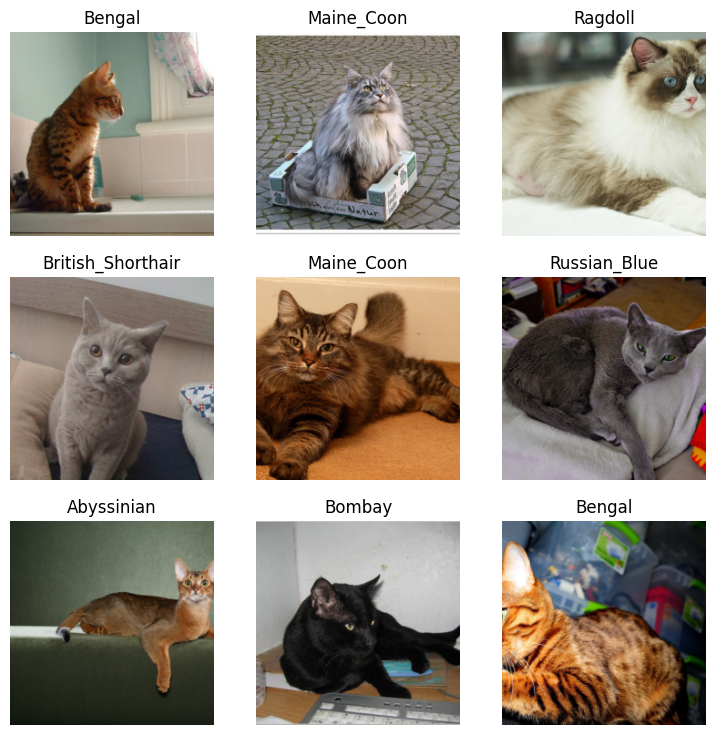

In [37]:
dls.show_batch()

In [38]:
learn = vision_learner(dls, resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /Users/allieokeeffe/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████████████████████████████████| 83.3M/83.3M [00:06<00:00, 13.8MB/s]


SuggestedLRs(valley=0.0010000000474974513)

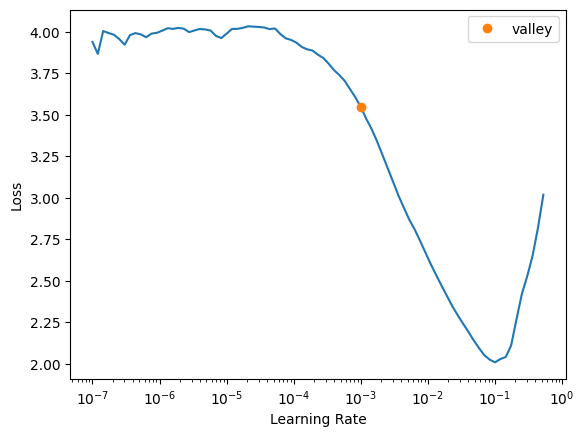

In [39]:
learn.lr_find()

In [44]:
learn.fine_tune(2, 1e-3)

epoch,train_loss,valid_loss,error_rate,time
0,0.225011,0.266809,0.104167,00:32


epoch,train_loss,valid_loss,error_rate,time
0,0.113329,0.246588,0.090278,00:51
1,0.091010,0.266924,0.104167,00:29


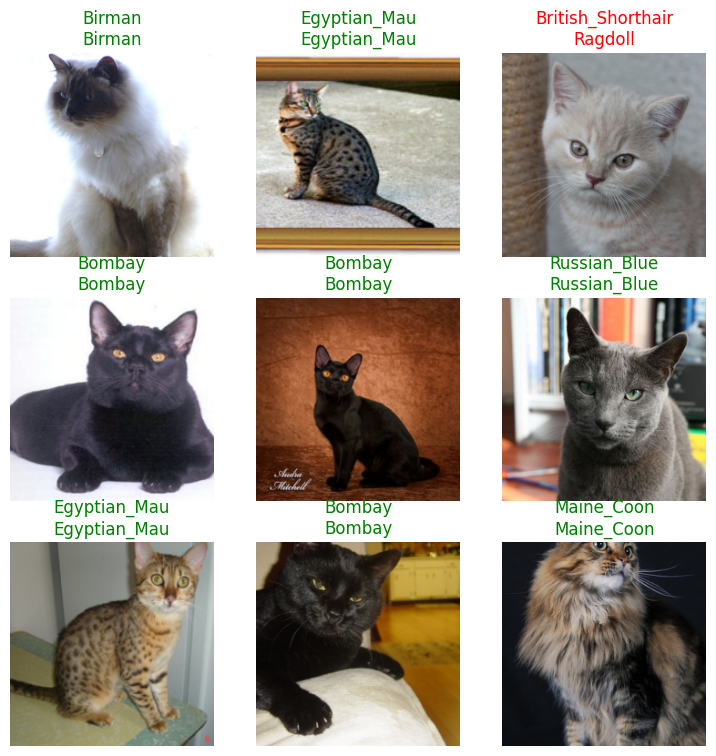

In [45]:
learn.show_results()

In [42]:
interp = Interpretation.from_learner(learn)

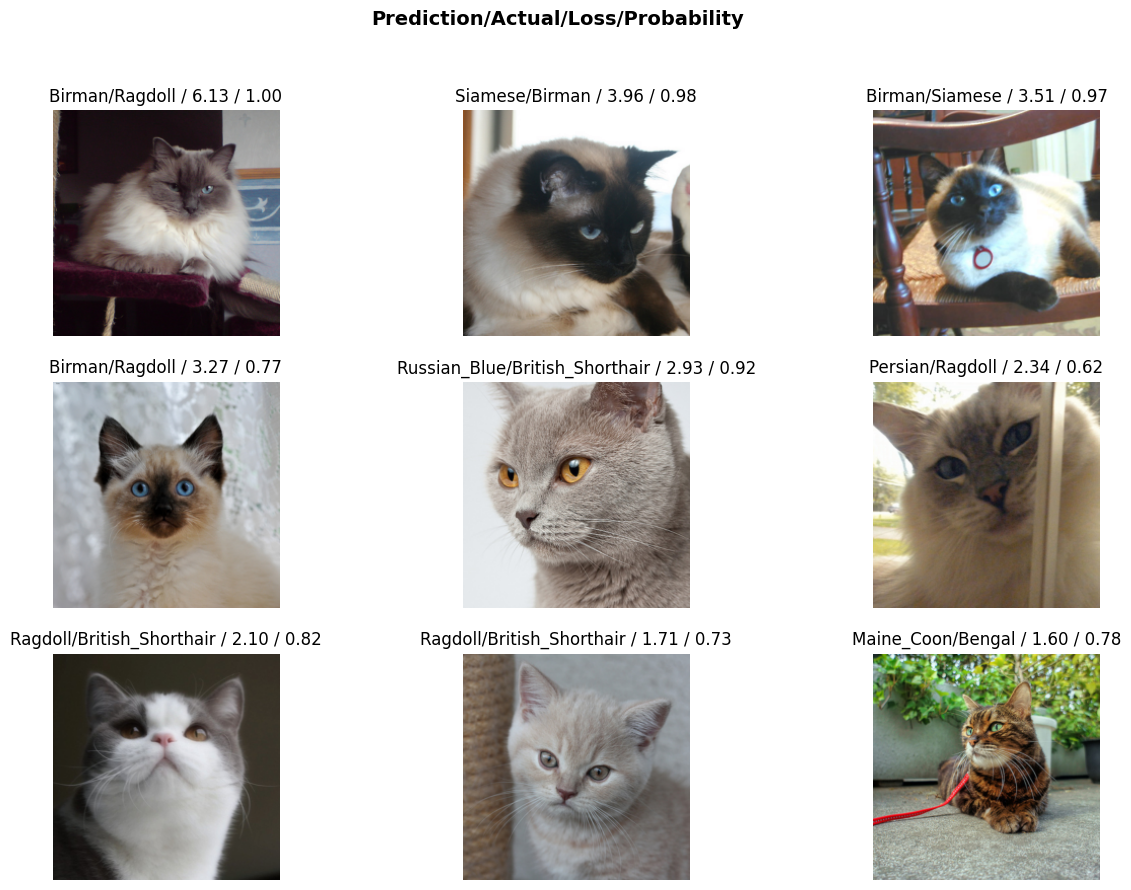

In [43]:
interp.plot_top_losses(9, figsize=(15,10))